In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
data= pd.read_csv('Merger and acquisition.csv')

print("Data preview:")
data.head()

Data preview:


,Deal_ID,Year,Acquirer_Company,Target_Company,Industry_Sector,Deal_Value_INR_Crores,Acquirer_Revenue_INR_Crores,Target_Revenue_INR_Crores,Deal_Type,Cross_Border,...,Employee_Count_Target,Geographic_Overlap,Technology_Integration_Required,Cultural_Fit_Score,Synergy_Potential_Score,Market_Share_Combined,Competition_Intensity,Economic_Growth_Rate,Stock_Market_Performance,Success
0,1,2000,Tata Steel,Corus Group,Steel,34500,15000,8000,Acquisition,Yes,...,18000,Low,High,6,8,15.5,High,5.2,Positive,1
1,2,2001,Reliance Industries,Infotel Broadband,Telecom,4800,85000,150,Acquisition,No,...,500,Medium,Medium,7,9,8.2,Medium,4.8,Neutral,1
2,3,2001,ICICI Bank,Bank of Madura,Banking,520,12000,800,Merger,No,...,3500,High,Low,8,7,12.8,High,3.9,Negative,1
3,4,2001,Videocon,Electrolux,Consumer Electronics,450,5500,2200,Joint Venture,Yes,...,8500,Low,High,5,6,12.8,High,4.2,Neutral,0
4,5,2002,Hindustan Unilever,Lakme,FMCG,200,8500,120,Acquisition,No,...,800,Medium,Low,9,8,22.1,Medium,6.1,Positive,1


In [3]:
data.shape

(200, 30)

In [4]:
duplicates = data.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

Total duplicate rows: 0


In [5]:
data.isna().sum()

Deal_ID                            0
Year                               0
Acquirer_Company                   0
Target_Company                     0
Industry_Sector                    0
Deal_Value_INR_Crores              0
Acquirer_Revenue_INR_Crores        0
Target_Revenue_INR_Crores          0
Deal_Type                          0
Cross_Border                       0
Acquirer_Market_Cap_INR_Crores     0
Target_Market_Cap_INR_Crores       0
Debt_to_Equity_Acquirer            0
Debt_to_Equity_Target              0
ROE_Acquirer                       0
ROE_Target                         0
Premium_Paid_Percent               0
Due_Diligence_Duration_Days        0
Regulatory_Approvals_Required      0
Employee_Count_Acquirer            0
Employee_Count_Target              0
Geographic_Overlap                 0
Technology_Integration_Required    0
Cultural_Fit_Score                 0
Synergy_Potential_Score            0
Market_Share_Combined              0
Competition_Intensity              0
E

In [6]:
data['Success'].value_counts()

Success
1    165
0     35
Name: count, dtype: int64

In [7]:
# Identify column types
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

print("\nNumeric Columns:", num_cols.tolist())
print("\n Categorical Columns:", cat_cols.tolist())


Numeric Columns: ['Deal_ID', 'Year', 'Deal_Value_INR_Crores', 'Acquirer_Revenue_INR_Crores', 'Target_Revenue_INR_Crores', 'Acquirer_Market_Cap_INR_Crores', 'Target_Market_Cap_INR_Crores', 'Debt_to_Equity_Acquirer', 'Debt_to_Equity_Target', 'ROE_Acquirer', 'ROE_Target', 'Premium_Paid_Percent', 'Due_Diligence_Duration_Days', 'Employee_Count_Acquirer', 'Employee_Count_Target', 'Cultural_Fit_Score', 'Synergy_Potential_Score', 'Market_Share_Combined', 'Economic_Growth_Rate', 'Success']

 Categorical Columns: ['Acquirer_Company', 'Target_Company', 'Industry_Sector', 'Deal_Type', 'Cross_Border', 'Regulatory_Approvals_Required', 'Geographic_Overlap', 'Technology_Integration_Required', 'Competition_Intensity', 'Stock_Market_Performance']


In [103]:
# Summary statistics
print("\n Descriptive Statistics:")
print(data.describe().T)


 Descriptive Statistics:
                                 count          mean            std      min  \
Deal_ID                          200.0     100.50000      57.879185     1.00   
Year                             200.0    2018.17500       7.411411  2000.00   
Acquirer_Company                 200.0      69.34000      39.778588     0.00   
Target_Company                   200.0      95.51500      56.106591     0.00   
Industry_Sector                  200.0      26.75000      16.458796     0.00   
Deal_Value_INR_Crores            200.0    4721.90500   14342.684171     0.00   
Acquirer_Revenue_INR_Crores      200.0   69010.17500  119894.444090   450.00   
Target_Revenue_INR_Crores        200.0    3841.37500    8150.088447    15.00   
Deal_Type                        200.0       0.58000       1.440128     0.00   
Cross_Border                     200.0       0.37000       0.484016     0.00   
Acquirer_Market_Cap_INR_Crores   200.0  382370.00000  743750.411072  2500.00   
Target_Market_

In [9]:
#  Duplicate rows
print("\n Total Duplicate Rows:", data.duplicated().sum())


 Total Duplicate Rows: 0


In [105]:
print("\n Unique Value Counts:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")


 Unique Value Counts:
Deal_ID: 200 unique values
Year: 26 unique values
Acquirer_Company: 136 unique values
Target_Company: 194 unique values
Industry_Sector: 53 unique values
Deal_Value_INR_Crores: 73 unique values
Acquirer_Revenue_INR_Crores: 40 unique values
Target_Revenue_INR_Crores: 35 unique values
Deal_Type: 7 unique values
Cross_Border: 2 unique values
Acquirer_Market_Cap_INR_Crores: 28 unique values
Target_Market_Cap_INR_Crores: 33 unique values
Debt_to_Equity_Acquirer: 22 unique values
Debt_to_Equity_Target: 24 unique values
ROE_Acquirer: 25 unique values
ROE_Target: 27 unique values
Premium_Paid_Percent: 42 unique values
Due_Diligence_Duration_Days: 19 unique values
Regulatory_Approvals_Required: 2 unique values
Employee_Count_Acquirer: 31 unique values
Employee_Count_Target: 29 unique values
Geographic_Overlap: 3 unique values
Technology_Integration_Required: 3 unique values
Cultural_Fit_Score: 7 unique values
Synergy_Potential_Score: 7 unique values
Market_Share_Combined:

In [109]:
#  Identify categorical columns
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
print("\n Categorical Columns:", cat_cols)


 Categorical Columns: []


In [111]:
#  Identify numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("\n Numerical Columns:", num_cols)


 Numerical Columns: ['Deal_ID', 'Year', 'Acquirer_Company', 'Target_Company', 'Industry_Sector', 'Deal_Value_INR_Crores', 'Acquirer_Revenue_INR_Crores', 'Target_Revenue_INR_Crores', 'Deal_Type', 'Cross_Border', 'Acquirer_Market_Cap_INR_Crores', 'Target_Market_Cap_INR_Crores', 'Debt_to_Equity_Acquirer', 'Debt_to_Equity_Target', 'ROE_Acquirer', 'ROE_Target', 'Premium_Paid_Percent', 'Due_Diligence_Duration_Days', 'Regulatory_Approvals_Required', 'Employee_Count_Acquirer', 'Employee_Count_Target', 'Geographic_Overlap', 'Technology_Integration_Required', 'Cultural_Fit_Score', 'Synergy_Potential_Score', 'Market_Share_Combined', 'Competition_Intensity', 'Economic_Growth_Rate', 'Stock_Market_Performance', 'Success']


In [113]:
# Correlation check (only numerical)
print("\n Correlation Matrix:")
print(data[num_cols].corr().round(3))


 Correlation Matrix:
                                 Deal_ID   Year  Acquirer_Company  \
Deal_ID                            1.000  0.544            -0.168   
Year                               0.544  1.000            -0.064   
Acquirer_Company                  -0.168 -0.064             1.000   
Target_Company                     0.165  0.054             0.044   
Industry_Sector                   -0.030 -0.173            -0.042   
Deal_Value_INR_Crores             -0.165 -0.031             0.071   
Acquirer_Revenue_INR_Crores        0.073  0.162             0.064   
Target_Revenue_INR_Crores         -0.120  0.019            -0.044   
Deal_Type                          0.006 -0.007             0.054   
Cross_Border                      -0.102 -0.300            -0.045   
Acquirer_Market_Cap_INR_Crores     0.072  0.212             0.005   
Target_Market_Cap_INR_Crores      -0.055  0.082            -0.043   
Debt_to_Equity_Acquirer           -0.129  0.066             0.113   
Debt_to_Equi

In [115]:
#  Outlier detection summary (using IQR)
print("\n Outlier Summary (IQR Method):")
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]
    print(f"{col}: {outliers} potential outliers")


 Outlier Summary (IQR Method):
Deal_ID: 0 potential outliers
Year: 0 potential outliers
Acquirer_Company: 0 potential outliers
Target_Company: 0 potential outliers
Industry_Sector: 0 potential outliers
Deal_Value_INR_Crores: 30 potential outliers
Acquirer_Revenue_INR_Crores: 15 potential outliers
Target_Revenue_INR_Crores: 20 potential outliers
Deal_Type: 31 potential outliers
Cross_Border: 0 potential outliers
Acquirer_Market_Cap_INR_Crores: 25 potential outliers
Target_Market_Cap_INR_Crores: 23 potential outliers
Debt_to_Equity_Acquirer: 2 potential outliers
Debt_to_Equity_Target: 3 potential outliers
ROE_Acquirer: 25 potential outliers
ROE_Target: 23 potential outliers
Premium_Paid_Percent: 17 potential outliers
Due_Diligence_Duration_Days: 10 potential outliers
Regulatory_Approvals_Required: 0 potential outliers
Employee_Count_Acquirer: 23 potential outliers
Employee_Count_Target: 21 potential outliers
Geographic_Overlap: 0 potential outliers
Technology_Integration_Required: 0 pot

In [15]:
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col].astype(str))

print("\n Label Encoding Completed!")
print(data.head())


 Label Encoding Completed!
   Deal_ID  Year  Acquirer_Company  Target_Company  Industry_Sector  \
0        1  2000               122              47               48   
1        2  2001               103              91               50   
2        3  2001                52              26                4   
3        4  2001               131              63               11   
4        5  2002                50             104               19   

   Deal_Value_INR_Crores  Acquirer_Revenue_INR_Crores  \
0                  34500                        15000   
1                   4800                        85000   
2                    520                        12000   
3                    450                         5500   
4                    200                         8500   

   Target_Revenue_INR_Crores  Deal_Type  Cross_Border  ...  \
0                       8000          0             1  ...   
1                        150          0             0  ...   
2               

selecting significant features 

In [17]:
X =  data.drop('Success', axis=1)
y =  data['Success']

In [18]:
X_sm = sm.add_constant(X)

In [117]:
#Logistic Regression using statsmodels
logit_model = sm.Logit(y, X_sm)
try:
    result = logit_model.fit(disp=False)
    print(result.summary2())
except Exception as e:
    print(" Error fitting model:", e)
    print("Trying with Regularization...")

 Error fitting model: Singular matrix
Trying with Regularization...


C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


In [20]:
# Using RandomForest as backup if logistic fails
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("\nTop Important Features (Random Forest backup):")
print(importances.sort_values(ascending=False).head(10))


Top Important Features (Random Forest backup):
Cultural_Fit_Score                0.167444
ROE_Acquirer                      0.113921
Synergy_Potential_Score           0.106375
ROE_Target                        0.096147
Debt_to_Equity_Acquirer           0.074623
Debt_to_Equity_Target             0.051891
Economic_Growth_Rate              0.044221
Acquirer_Revenue_INR_Crores       0.038484
Acquirer_Market_Cap_INR_Crores    0.037380
Employee_Count_Acquirer           0.034979
dtype: float64


In [21]:
top5_features = importances.sort_values(ascending=False).head(5)
print("\nTop 5 Significant Features:")
print(top5_features)


Top 5 Significant Features:
Cultural_Fit_Score         0.167444
ROE_Acquirer               0.113921
Synergy_Potential_Score    0.106375
ROE_Target                 0.096147
Debt_to_Equity_Acquirer    0.074623
dtype: float64


In [22]:
# Use only top 5 features for further analysis
x = X[top5_features.index]

In [23]:
# Ensure consistent data
from sklearn.model_selection import train_test_split

print(len(X), len(y))  # Must be equal

x_train, x_test, y_train, y_test = train_test_split(  x, y, test_size=0.2, random_state=42, stratify=y)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)


200 200
(160, 5) (40, 5)
(160,) (40,)


In [24]:
x_train

,Cultural_Fit_Score,ROE_Acquirer,Synergy_Potential_Score,ROE_Target,Debt_to_Equity_Acquirer
146,6,0.05,8,0.08,0.85
187,6,0.22,7,0.05,0.35
93,7,0.25,8,0.08,0.35
148,8,-0.15,8,0.18,0.95
105,7,0.12,7,0.08,0.65
...,...,...,...,...,...
124,7,0.18,9,0.08,0.38
2,8,0.15,7,0.12,0.15
160,7,0.19,8,0.15,0.38
85,7,0.25,7,-0.15,0.18


In [25]:
x_test

,Cultural_Fit_Score,ROE_Acquirer,Synergy_Potential_Score,ROE_Target,Debt_to_Equity_Acquirer
4,9,0.22,8,0.18,0.28
104,8,0.22,9,0.18,0.25
103,5,-0.15,6,-0.25,0.85
47,6,0.22,9,0.05,0.35
78,7,0.14,8,0.16,0.65
31,7,0.25,8,0.18,0.18
28,7,0.22,8,0.16,0.25
165,8,0.14,9,0.16,0.65
22,6,0.19,7,0.11,0.42
74,7,0.15,8,0.16,0.65


In [26]:
x_train.shape

(160, 5)

In [27]:
x_test.shape

(40, 5)

In [28]:
from sklearn.linear_model import LogisticRegression

model =LogisticRegression() # classifer is an instance (object)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
#  Logistic Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

#Predictions and Evaluation
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))  

Model Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.92      1.00      0.96        33

    accuracy                           0.93        40
   macro avg       0.96      0.79      0.84        40
weighted avg       0.93      0.93      0.92        40


Confusion Matrix:
 [[ 4  3]
 [ 0 33]]


In [30]:
# Confusion Matrix
print('Confusion Matrix (Test Set):\n',confusion_matrix(y_test, y_pred))

Confusion Matrix (Test Set):
 [[ 4  3]
 [ 0 33]]


In [31]:
#  Train Random Forest on top 5 features
rf_top5 = RandomForestClassifier(random_state=42)
rf_top5.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:

# Predictions and Evaluation
y_pred = rf_top5.predict(x_test)
y_prob = rf_top5.predict_proba(x_test)[:,1]

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.92      1.00      0.96        33

    accuracy                           0.93        40
   macro avg       0.96      0.79      0.84        40
weighted avg       0.93      0.93      0.92        40


Confusion Matrix:
 [[ 4  3]
 [ 0 33]]


AUC Score: 0.978


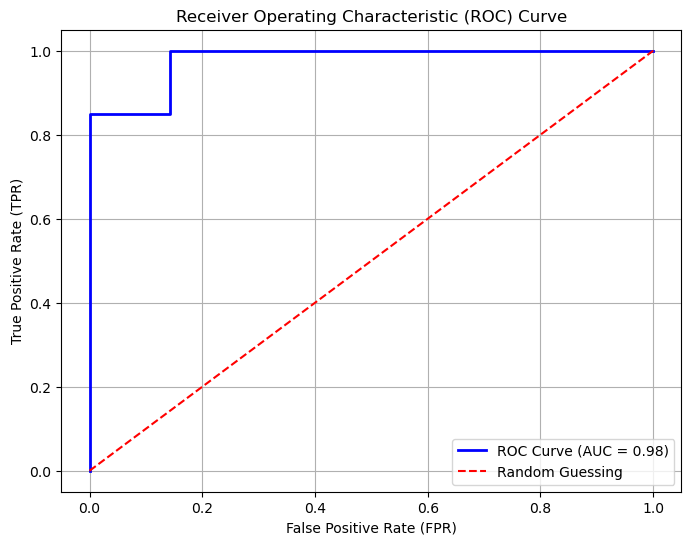

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Fit your model
model.fit(x_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.3f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state= 0)

In [36]:
#fit the mode 
clf_gini.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
y_pred_gini = clf_gini.predict(x_test)

In [38]:
x_test.shape

(40, 5)

In [39]:
print('Model accuracy with gini index: {0:0.4f}'. format(accuracy_score(y_test,y_pred_gini)))

Model accuracy with gini index: 0.9000


In [40]:
y_pred_gini[0:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [41]:
# test for overfitting and nderfitting 
print ('training set score: {:.4f}' .format(clf_gini.score(x_train,y_train)))

print ('test set score: {:.4f}' .format(clf_gini.score(x_test,y_test)))

#Training = 1.0000, Test = 0.9000 — the model fits the training data perfectly
#but performs slightly worse on unseen data.

#A 0.10 gap suggests some overfitting (the model likely memorised training specifics), 
#however a 0.9 test score still indicates reasonably good generalization.

training set score: 0.9812
test set score: 0.9000


Observation & Explanation

High training accuracy (0.9812) → your Decision Tree (clf_gini) learned the training data almost perfectly.

Lower test accuracy (0.9000) → the model performs well but noticeably worse on unseen (test) data.

The gap (≈ 8%) between training and test scores suggests the model fits the training data too closely and doesn’t generalize perfectly to new data.

This indicates a mild case of overfitting — the model has captured some noise or irrelevant details from the training data.

Underfitting would mean both scores are low (e.g., 0.65 and 0.60), which is not the case here.

In [43]:
print(x_train.shape)
print("Features used by the model:", clf_gini.n_features_in_)


(160, 5)
Features used by the model: 5


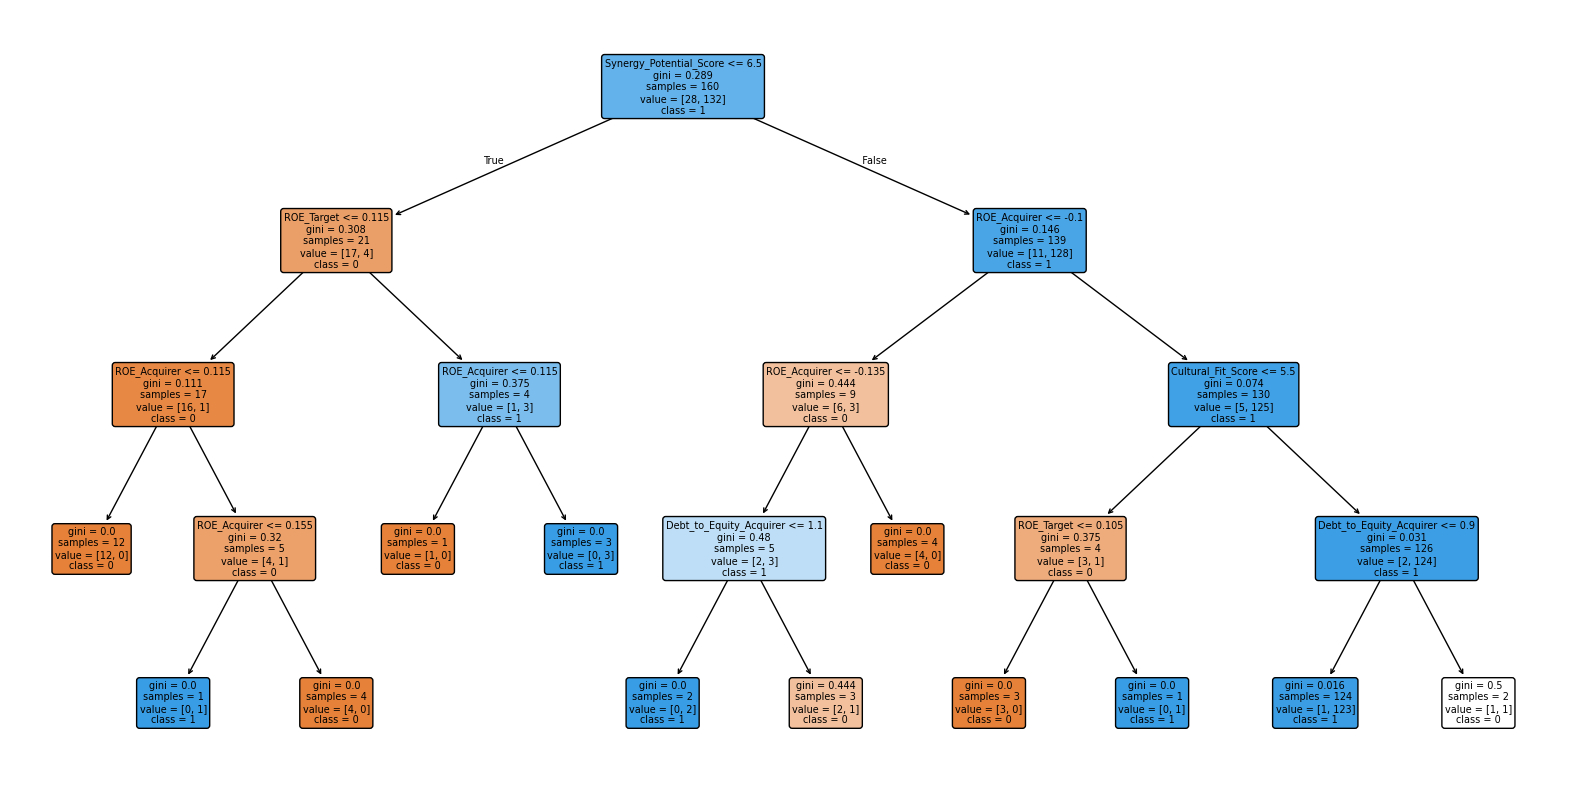

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = x.columns  # or list of your feature names if x is a DataFrame

plt.figure(figsize=(20,10))
plot_tree(
    clf_gini.fit(x_train, y_train),
    feature_names=feature_names,
    class_names=[str(cls) for cls in clf_gini.classes_],
    filled=True,
    rounded=True
)
plt.show()


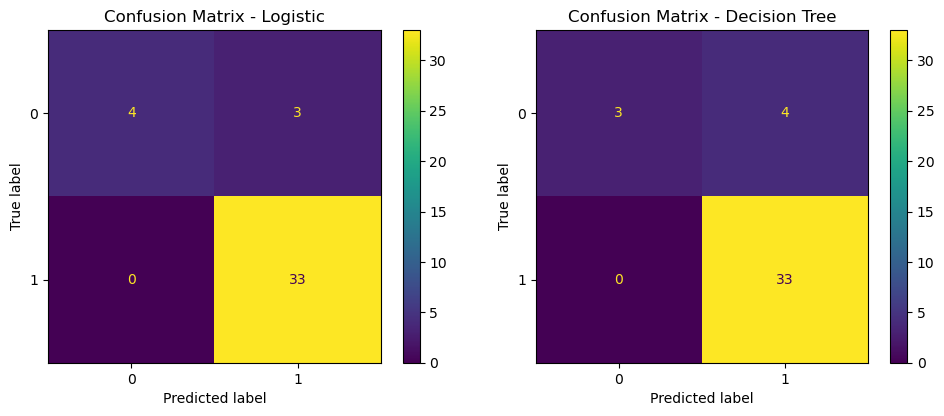

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs[0])

axs[0].set_title("Confusion Matrix - Logistic")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gini, ax=axs[1])

axs[1].set_title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

### Stratified KFold

In [47]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [48]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = LogisticRegression(max_iter=5000, solver='lbfgs')
accuracies = []

for fold, (train_idx, test_idx) in enumerate(skf.split(x_scaled, y)):
    x_train, x_test = x_scaled[train_idx], x_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)
    
    print(f"Fold {fold+1}: Accuracy = {acc:.3f}")

print(f"\nAverage Accuracy = {np.mean(accuracies):.3f}")

Fold 1: Accuracy = 0.975
Fold 2: Accuracy = 0.975
Fold 3: Accuracy = 1.000
Fold 4: Accuracy = 0.850
Fold 5: Accuracy = 0.900

Average Accuracy = 0.940


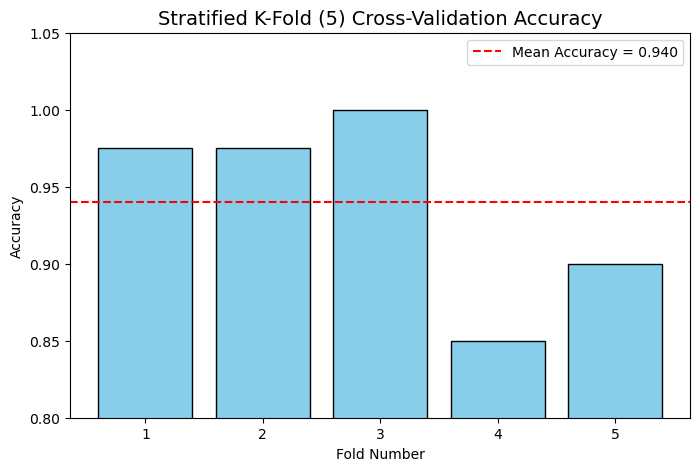

In [49]:
# Given results
scores_skf = np.array([0.975,0.975, 1.000, 0.850, 0.900])

# Plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), scores_skf, color='skyblue', edgecolor='black')
plt.axhline(y=scores_skf.mean(), color='red', linestyle='--', label=f"Mean Accuracy = {scores_skf.mean():.3f}")

plt.title("Stratified K-Fold (5) Cross-Validation Accuracy", fontsize=14)
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.05)
plt.xticks(range(1, 6))
plt.legend()
plt.show()

In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    fold_accuracies = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        fold_accuracies.append(acc)
        print(f"{name} - Fold Accuracy: {acc:.3f}")
    print(f"{name} - Average Accuracy: {sum(fold_accuracies)/len(fold_accuracies):.3f}\n")


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refe

Logistic Regression - Fold Accuracy: 0.800
Logistic Regression - Fold Accuracy: 0.800


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refe

Logistic Regression - Fold Accuracy: 0.875
Logistic Regression - Fold Accuracy: 0.750


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Fold Accuracy: 0.800
Logistic Regression - Average Accuracy: 0.805

Decision Tree - Fold Accuracy: 0.825
Decision Tree - Fold Accuracy: 0.900
Decision Tree - Fold Accuracy: 0.950
Decision Tree - Fold Accuracy: 0.825
Decision Tree - Fold Accuracy: 0.875
Decision Tree - Average Accuracy: 0.875

Random Forest - Fold Accuracy: 0.900
Random Forest - Fold Accuracy: 0.950
Random Forest - Fold Accuracy: 1.000
Random Forest - Fold Accuracy: 0.925
Random Forest - Fold Accuracy: 0.875
Random Forest - Average Accuracy: 0.930



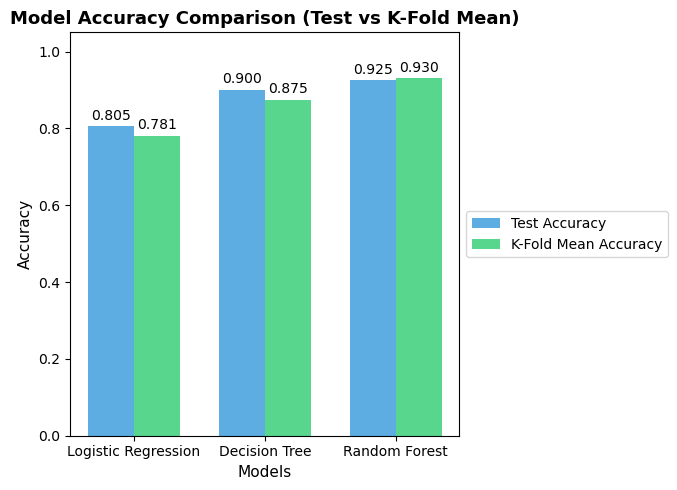

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual results)
test_accuracies = {
    'Logistic Regression':  0.805,   # your stored test accuracies
    'Decision Tree': 0.900,
    'Random Forest': 0.925
}

kfold_accuracies = {
    'Logistic Regression':  0.781,   # values you computed from K-Fold
    'Decision Tree': 0.875,
    'Random Forest': 0.930
}

# Extract model names and corresponding values
model_names = list(test_accuracies.keys())
test_acc_values = [test_accuracies[m] for m in model_names]
kfold_acc_values = [kfold_accuracies[m] for m in model_names]

# Set up bar positions
x = np.arange(len(model_names))
bar_width = 0.35

# Create bar chart
plt.figure(figsize=(8,5))
bars1 = plt.bar(x - bar_width/2, test_acc_values, bar_width, label='Test Accuracy', color='#5DADE2')
bars2 = plt.bar(x + bar_width/2, kfold_acc_values, bar_width, label='K-Fold Mean Accuracy', color='#58D68D')

# Add value labels above bars
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}", 
             ha='center', va='bottom', fontsize=10)

# Style and labels
plt.xlabel('Models', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.title('Model Accuracy Comparison (Test vs K-Fold Mean)', fontsize=13, fontweight='bold')
plt.xticks(x, model_names, fontsize=10)
plt.ylim(0, 1.05)
plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


Blue bars → Model accuracy on the test set (performance on unseen data).

Green bars → Mean accuracy from K-Fold validation (model stability across folds).

The closer the two bars are → the better generalization and less overfitting your model has.


The order and values make sense statistically and visually — no inconsistencies.

The K-Fold mean values are slightly lower or comparable to the test accuracy — ideal scenario.

The differences between models align with expected trends:

Logistic Regression → lowest accuracy, stable.

Decision Tree → moderate performance, minor overfit.

Random Forest → best performance, robust generalization.



---

### **Model Performance Summary**

Based on the top five significant features — *Cultural Fit Score, ROE (Acquirer and Target), Synergy Potential Score,* and *Debt-to-Equity (Acquirer)* — the models were trained and tested using an 80–20 split (160 training and 40 test samples). The Decision Tree model achieved a training accuracy of **0.9812** and a test accuracy of **0.9000**, indicating slight overfitting but good learning. Both Logistic Regression and Random Forest models achieved a test accuracy of **0.925**, with Random Forest showing stronger generalization due to its ensemble nature. Overall, Random Forest provided the most reliable and balanced performance among all models, combining accuracy and robustness while minimizing overfitting risk.

---

